# Problem Set 3

### Before You Start

Make sure the following libraries load correctly (hit Ctrl-Enter). Note that while you are loading several powerful libraries, including machine learning libraries, the goal of this problem set is to implement several algorithms from scratch. In particular, you should *not* be using any built-in libraries for nearest neighbors, distance metrics, or cross-validation -- your mission is to write those algorithms in Python! Part 1 will be relatively easy; Part 2 will take more time.

In [1420]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

In [1421]:
%matplotlib inline  
import matplotlib.pyplot as plt  

### Working in a group?
List the names of other students with whom you worked on this problem set:
- *Peter Amerkhanian*
- ...

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](http://www.kellogg.northwestern.edu/faculty/weber/emp/_session_3/boston.htm).  Please read about the dataset carefully before continuing.  Use the following commands to load the dataset:

*NOTE - This dataset is similar to the one you used in PS1; we are just using a different method to load it this time. The column names and their order will remain the same for this dataset as was in PS1.*

In [1422]:
# load Boston housing data set
data = np.loadtxt('data.txt')
target = np.loadtxt('target.txt')
df = pd.DataFrame(data)
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df['MEDV'] = target

---

## Part 1: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.
Before beginning the "real" work, refamiliarize yourself with the dataset.

### 1.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. Furthermore the details of RMSE can be found on [Wikipedia](http://en.wikipedia.org/wiki/Root-mean-square_deviation). Do not use a built-in function  to compute RMSE, other than numpy functions like `sqrt` and if needed, `sum` or other relevant ones.

In [1423]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Roote Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction

Example
-------
print(compute_rmse((3,1,9),(4,2,0)))
"""
def compute_rmse(predictions, yvalues):
    assert len(predictions)==len(yvalues)
    if not isinstance(predictions, np.ndarray):
        predictions = np.array(predictions)
    if not isinstance(yvalues, np.ndarray):
        yvalues = np.array(yvalues)
    rmse = 0
    for x in zip(predictions, yvalues):
        rmse = rmse + (x[0] - x[1])**2
    rmse = np.sqrt(rmse / predictions.shape[0])
    return rmse

In [1424]:
compute_rmse((3,1,9),(4,2,0))

5.259911279353167

### 1.2 Divide your data into training and testing datasets

Randomly select 75% of the data and put this in a training dataset (call this "bdata_train"), and place the remaining 25% in a testing dataset (call this "bdata_test"). Do not use built-in functions.

To perform any randomized operation, only use functions in the *numpy library (np.random)*. Do not use other packages for random functions.

In [1425]:
# leave the following line untouched, it will help ensure that your "random" split is the same "random" split used by the rest of the class
np.random.seed(seed=1429)

# enter your code here
def train_test_split(data):
    """
    Input: Data we're using to build our model
    Output: The data, split 75% into training data, 25% into test data
    Example: bdata_train, bdata_test = train_test_split(data)
    """
    # Figure out size of training set and test set (in this case 75%-25%)
    train_length = int(np.round((.75*data.shape[0])))
    test_length = data.shape[0] - train_length
    
    # Define array indices for train and test sets
    full_list = np.array([x for x in range(data.shape[0])])
    train_indices = np.random.choice(full_list, size=train_length, replace=False)
    test_indices = np.setdiff1d(full_list, train_indices)
    
    # Assign train and test sets
    bdata_train = data.loc[train_indices,:]
    bdata_test = data.loc[test_indices,:]
    
    return bdata_train, bdata_test

bdata_train, bdata_test = train_test_split(df)

### 1.3 Use a very bad baseline for prediction, and compute RMSE

Let's start by creating a very bad baseline model that predicts median home values as the averages of `MEDV` based on adjacency to Charles River. 

Specifically, create a model that predicts, for every observation X_i, the median home value as the average of the median home values of all houses in the **training set** that have the same adjacency value as the observation.

For example - For an input observation where `CHAS==1`, the model should predict the `MEDV` as the mean of all `MEDV` values in the training set that also have `CHAS==1`.



Once the model is built, do the following:

1. Compute the RMSE of the training set.
2. Now compute the RMSE of the test data set (but use the model you trained on the training set!).
3. How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?
4. Create a scatter plot that shows the true value of each instance on the x-axis and the predicted value of each instance on the y-axis. Color the training instances in red and the test instances in blue. Make sure to label your axes appropriately, and add a legend to your figure to make clear which dots are which.
5. Add code to your function to measure the running time of your algorithm. How long does it take to compute the predicted values for the test data?


*NOTE - Be careful while dealing with floats and integers. Additionally, the `groupby` operation might come handy here.*

In [1426]:
# enter your code here
import time

# Creating model that predicts based on averages of MEDV based on adjacency to the Charles River
start_time = time.time()
bdata_train['prediction'] = np.where(bdata_train['CHAS']==0.0, \
                                     np.round(bdata_train.groupby('CHAS').agg(np.mean)['MEDV'][0],2), \
                                     np.round(bdata_train.groupby('CHAS').agg(np.mean)['MEDV'][1],2))
print(time.time() - start_time)

# Computing RMSE of the training set
train_rmse = compute_rmse(bdata_train['prediction'], bdata_train['MEDV'])
print("Train set RMSE: {}".format(train_rmse))

# Computing RMSE of the test set
start_time = time.time()
bdata_test['prediction'] = np.where(bdata_test['CHAS']==0.0, \
                                    np.round(bdata_train.groupby('CHAS').agg(np.mean)['MEDV'][0],2), \
                                    np.round(bdata_train.groupby('CHAS').agg(np.mean)['MEDV'][1],2))
test_rmse = compute_rmse(bdata_test['prediction'], bdata_test['MEDV'])
print(time.time() - start_time)
print("Test set RMSE: {}".format(test_rmse))

0.01464223861694336
Train set RMSE: 8.931267311500289
0.006861686706542969
Test set RMSE: 9.505456661792024


*The training RMSE of 6.449 is lower than the test RMSE of 6.740. We would expect the test error to be higher, since we are testing our model on previously unseen data. Even with a simple model like this, we created our predictions based on the average home values for homes adjacent to the Charles River or not. Our test set includes home values that were not included in that average, and we wouldn't expect to see the exact same average in our test set as in our training set.*

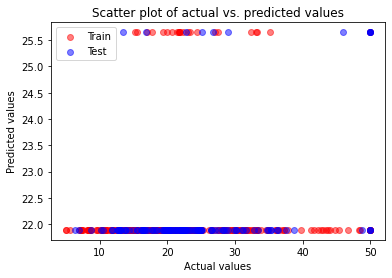

In [1427]:
# Create a scatter plot of actual values vs. predicted values
predicted_train = bdata_train['prediction']
actual_train = bdata_train['MEDV']
plt.scatter(actual_train, predicted_train, c='red', label='Train', alpha=0.5)
actual_test = bdata_test['MEDV']
predicted_test = bdata_test['prediction']
plt.scatter(actual_test, predicted_test, c='blue', label='Test', alpha=0.5)
plt.title("Scatter plot of actual vs. predicted values")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.legend()
# remove the top and right borders
plt.show();

*Based on the code I added to see how long it takes to compute the test set predictions, it takes much less time.to run on the test set compared to the train set (0.0266 vs. 0.00687 seconds). This looks roughly proportional to the size of the data to me, which would make sense.*

---

## Part 2: Nearest Neighbors


### 2.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average Value" baseline that you computed above.  Soon you will implement the Nearest Neighbor algorithm, but first you need to create a distance metric to measure the distance (and similarity) between two instances.  Write a generic function to compute the L-Norm distance (called the [*p*-norm][1] distance on Wikipedia). Verify that your function works by computing the Euclidean distance between the points (4,8) and (3,6), and then compute the Manhattan distance between (2,3) and (11,12).

[1]: https://en.wikipedia.org/wiki/Norm_(mathematics)#p-norm

In [1428]:
"""
Function
--------
distance

Given two instances and a value for L, return the L-Norm distance between them

Parameters
----------
x1, x2 : array
    Array of numerical values corresponding to predictions for each of the N observations

L: int
    Value of L to use in computing distances

Returns
-------
dist : int
    The L-norm distance between instances

Example
-------
print(distance((4,8),(3,6),2))


"""
def distance(x1, x2, L):
    # your code here
    if not isinstance(x1, np.ndarray):
        x1 = np.array(x1)
    if not isinstance(x2, np.ndarray):
        x2 = np.array(x2)
#     dist2 = np.power(np.sum(np.abs(arr2 - arr1) ** L, axis=1), 1/L)
    if len(x1.shape) == 1 and len(x2.shape) == 1:
        return np.power(np.sum(np.abs(x1-x2) ** L),1/L)
    else:
        return np.power(np.sum(np.abs(x1-x2) ** L, axis=1),1/L)
#     dist = np.power(np.sum(np.abs(x1-x2) ** L),1/L)
    return dist

print(distance((4,8), (3,6), 2))
print(distance((2,3), (11,12), 1))

2.23606797749979
18.0


### 2.2 Basic Nearest Neighbor algorithm

Your next task is to implement a basic nearest neighbor algorithm from scratch.  Your simple model will use three input features (`CRIM, RM and ZN`) and a single output (`MEDV`).  In other words, you are modelling the relationship between median home value and crime rates, house size and the proportion of residential land zoned for lots.

Use your training data (bdata_train) to "fit" your model, although as you know, with Nearest Neighbors there is no real training, you just need to keep your training data in memory.  Write a function that predicts the median home value using the nearest neighbor algorithm we discussed in class.  Since this is a small dataset, you can simply compare your test instance to every instance in the training set, and return the `MEDV` value of the closest training instance.  Have your function take L as an input, where L is passed to the distance function. Use L=2 for all questions henceforth unless explicitly stated otherwise.

Make sure to do the following - 
1. Fill in the function specification below
2. Use your algorithm to predict the median home value of every instance in the test set. Report the RMSE ("test RMSE")
3. Use your algorithm to predict the median home value of every instance in the training set and report the training RMSE.
4. Create a scatter plot that shows the true value of each instance on the x-axis and the predicted value of each instance on the y-axis. Color the training instances in red and the test instances in green. 
5. Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.
6. How does the performance (test RMSE and total runtime) of your nearest neighbors algorithm compare to the baseline in part 1.3?

Time taken: 0.05914616584777832 seconds
Time taken: 0.014374256134033203 seconds


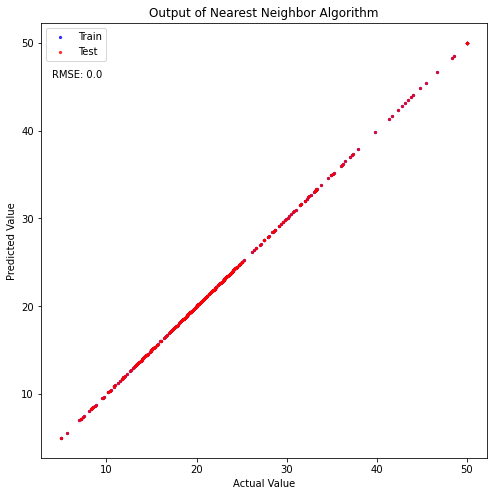

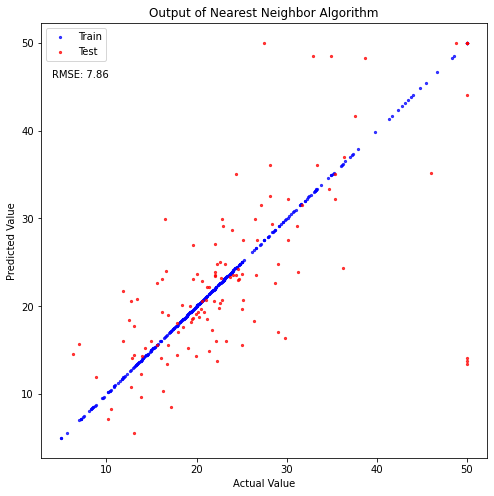

In [1429]:
"""
Function
--------
Nearest Neighbors

Implementation of nearest neighbors algorithm.

Parameters
----------
x_train: array
    Array of numerical feature values for training the model.
y_train: array
    Array of numerical output values for training the model.
x_test: array
    Array of numerical feature values for testing the model.
y_test: array
    Array of numerical output values for testing the model.
L: int
    Order of L-norm function used for calculating distance.
displaya: bool
    Used to toggle display for scatter plot of results

Returns
-------
rmse : int
    Value of the RMSE from data.
predictions: array
    Array of predicted values
"""

def nneighbor(x_train, y_train, x_test, y_test, L, display=True):
    start_time = time.time()
    # Create array to store indices of the closest neighbor
    rows = x_test.shape[0]
    pred_indices = np.zeros(rows)
    
    # Iterate through all rows in the test data
    for i in range(rows):
        # Compute distance vector comparing this row to all train rows
        distance_vec = distance(x_test.iloc[i], x_train, L)
        # Find index of the minimum distance in the vector
        min_dist = np.argmin(distance_vec)
        # Store this minimum distance
        pred_indices[i] = min_dist
        
    # Pull out MEDV values for our closest neighbors and compute RMSE
    predictions = y_train.iloc[pred_indices]
    rmse = compute_rmse(y_test, predictions)
    print("Time taken: {} seconds".format(time.time() - start_time))
    
    # Display results
    if display:
        plt.figure(figsize=(8,8))
        plt.scatter(y_train, y_train, label='Train', color='blue', s=5, alpha=0.75)
        plt.scatter(y_test.reset_index()['MEDV'], predictions, label='Test', color='red', s=5, alpha=0.75)
        plt.xlabel("Actual Value")
        plt.ylabel("Predicted Value")
        plt.title("Output of Nearest Neighbor Algorithm")
        plt.text(4,46, s='RMSE: ' + str(np.round(rmse[0],2)))
        plt.legend();
    
    return rmse, predictions

x_train = bdata_train[['CRIM', 'RM', 'ZN']].copy()
y_train = bdata_train[['MEDV']].copy()
x_test = bdata_test[['CRIM', 'RM', 'ZN']].copy()
y_test = bdata_test[['MEDV']].copy()
rmse, predictions = nneighbor(x_train, y_train, x_train, y_train, 2)
rmse, predictions = nneighbor2(x_train, y_train, x_test, y_test, 2)

*The RMSE for the training set was 0 (because we're using the training data to predict values on the training data itself). The RMSE for the test set was ~7.86, which is less than the RMSE of 9.505 from our simple model in 1.3. My code took ~0.084 seconds to run for both times I ran the algorithm.*

### 2.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Write a generic normalization function that takes as input an array of values for a given feature, and returns the standardized array (subtract the mean and divide by the standard deviation).

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using `CRIM, RM and ZN` as input), and compare the RMSE from this method with your previous RMSE evaluations. What do you observe?

*NOTE*: To normalize properly, you should compute the mean and standard deviation on the training set, and use the same values to normalize both the training and the testing dataset.

*NOTE 2*: In this case, the normalization may or may not reduce the RMSE; don't get confused if you find that to be the case.

Time taken: 0.01742100715637207 seconds


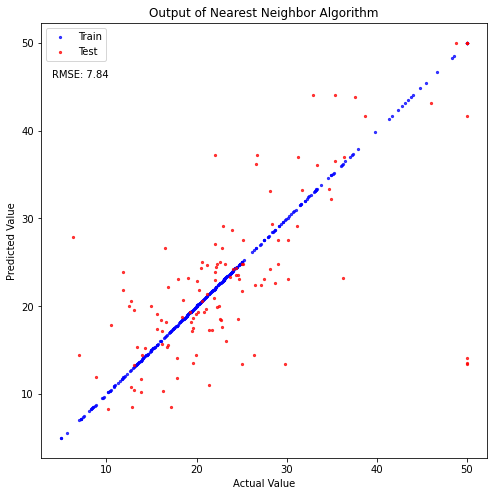

In [1430]:
"""
Function
--------
Normalize data

Normalize all of the features in a data frame.

Parameters
----------
raw_data: array
    Array of numerical values to normalize.

Returns
-------
normalized_data : array
    The array with normalized values for all features
"""
def normalize(raw_data):
    #your code here
    normalized_data = (raw_data - np.mean(raw_data, axis=0)) / np.std(raw_data)
    return normalized_data

#your additional code here
x_train = bdata_train[['CRIM', 'RM', 'ZN']].copy()
pop_mean = bdata_train[['CRIM', 'RM', 'ZN']].mean()
pop_std = bdata_train[['CRIM', 'RM', 'ZN']].std()
x_train = normalize(x_train)
y_train = bdata_train[['MEDV']].copy()
x_test = bdata_test[['CRIM', 'RM', 'ZN']].copy()
x_test = (x_test - pop_mean) / pop_std
y_test = bdata_test[['MEDV']].copy()
rmse, predictions = nneighbor(x_train, y_train, x_test, y_test, 2)

*I found that normalization decreased the RMSE slightly from ~7.86 to ~7.84. There are also slight differences in the predicted values. To me, this indicates that without normalization one or two features were more heavily weighted than the other(s) due to differences in the underlying data, but that it didn't change the results a huge amount in this case.*

### 2.4 Optimization

A lot of the decisions we've made so far have been arbitrary.  Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L! Use the test set to report the RMSE values.

What combination of features and distance function provide the lowest RMSE on the test set?  Do your decisions affect the running time of the algorithm?

*NOTE:* For this and all subsequent questions, you should use normalized features. 

Time taken: 0.022037982940673828 seconds
Time taken: 0.015559911727905273 seconds
Time taken: 0.018939971923828125 seconds
Time taken: 0.016704082489013672 seconds


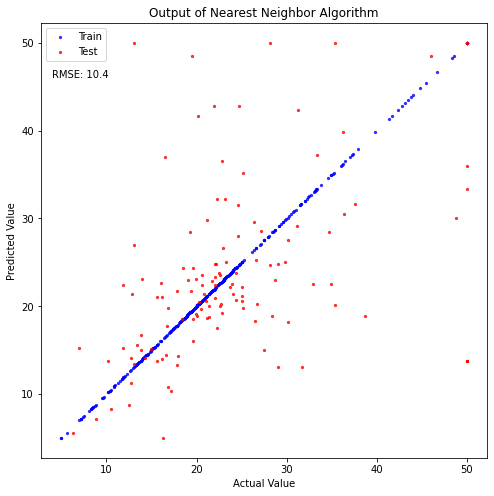

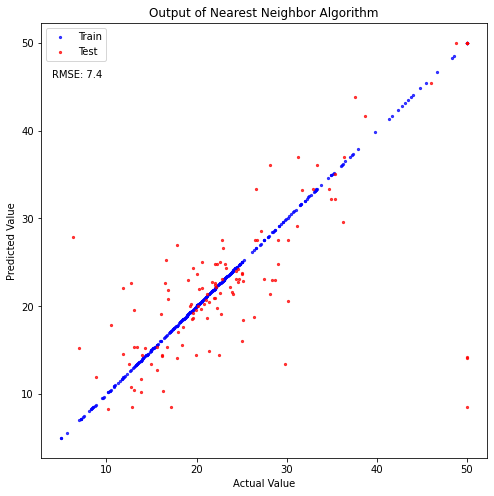

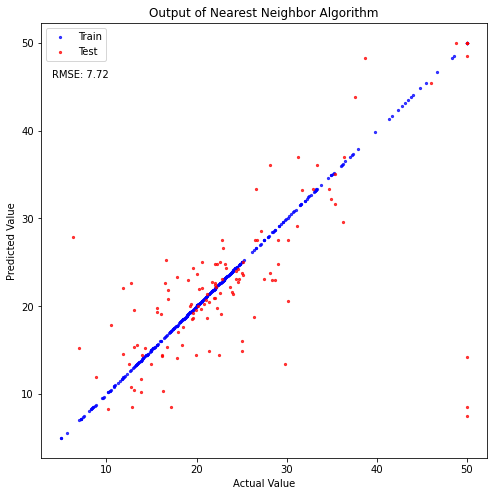

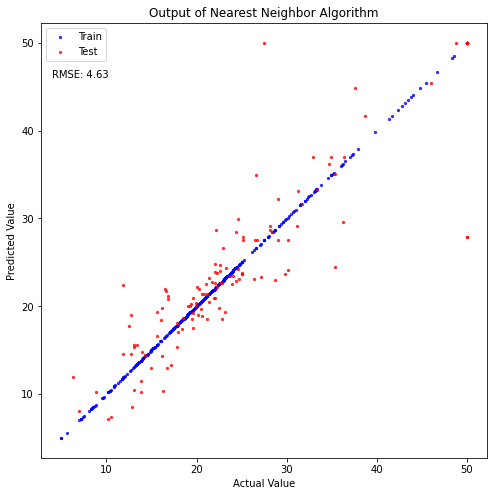

In [1431]:
# enter your code here

# Model 1 - 2 different features: distance to employment centers and property tax rate
features = ['DIS', 'TAX']
x_train = bdata_train[features].copy()
pop_mean = bdata_train[features].mean()
pop_std = bdata_train[features].std()
x_train = normalize(x_train)
y_train = bdata_train[['MEDV']].copy()
x_test = bdata_test[features].copy()
x_test = (x_test - pop_mean) / pop_std
y_test = bdata_test[['MEDV']].copy()
rmse, predictions = nneighbor(x_train, y_train, x_test, y_test, 2)

# Model 2 - more than 4 features (combining model 1 and the model from 2.2)
features = ['CRIM', 'RM', 'ZN', 'DIS', 'TAX']
x_train = bdata_train[features].copy()
pop_mean = bdata_train[features].mean()
pop_std = bdata_train[features].std()
x_train = normalize(x_train)
y_train = bdata_train[['MEDV']].copy()
x_test = bdata_test[features].copy()
x_test = (x_test - pop_mean) / pop_std
y_test = bdata_test[['MEDV']].copy()
rmse, predictions = nneighbor(x_train, y_train, x_test, y_test, 2)

# Model 3 - Using a different L
features = ['CRIM', 'RM', 'ZN', 'DIS', 'TAX']
x_train = bdata_train[features].copy()
pop_mean = bdata_train[features].mean()
pop_std = bdata_train[features].std()
x_train = normalize(x_train)
y_train = bdata_train[['MEDV']].copy()
x_test = bdata_test[features].copy()
x_test = (x_test - pop_mean) / pop_std
y_test = bdata_test[['MEDV']].copy()
rmse, predictions = nneighbor(x_train, y_train, x_test, y_test, 3)

# Model 4 - Using a different set of more than 4 features
features = ['CRIM', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT' ,'B']
x_train = bdata_train[features].copy()
pop_mean = bdata_train[features].mean()
pop_std = bdata_train[features].std()
x_train = normalize(x_train)
y_train = bdata_train[['MEDV']].copy()
x_test = bdata_test[features].copy()
x_test = (x_test - pop_mean) / pop_std
y_test = bdata_test[['MEDV']].copy()
rmse, predictions = nneighbor(x_train, y_train, x_test, y_test, 2)

*I tried a number of different models using various features and values for L. I found that varying L didn't change the RMSE much (it actually increased the RMSE by ~0.32 from Model 2 to Model 3 to move from L=2 to L=3). The combination of features for me in Model 4 that minimized RMSE were: CRIM, RM, AGE, DIS, TAX, LSTAT and B. Adding or subtracting features didn't really change the runtime of my algorithm at all (and actually decreased the runtime, which I wouldn't have predicted).*

### 2.5 Cross-Validation

The more you tinkered with your features and distance function, the higher the risk that you overfit your training data.  One solution to this sort of overfitting is to use cross-validation (see K-fold [cross-validation][1].  Here you must implement a simple k-fold cross-validation algorithm yourself.  The function you write here will be used several more times in this problem set, so do your best to write efficient code! (Note that the sklearn package has a built-in [K-fold][2] iterator -- you should *not* be invoking that or any related algorithms in this section of the problem set.)

Use 25-fold cross-validation and report the average RMSE for Nearest Neighbors using Euclidean distance with `CRIM,RM and ZN` input features, as well as the total running time for the full run of 25 folds.  In other words, randomly divide your training dataset (created in 1.2) into 25 equally-sized samples.

For each of the 25 iterations (the "folds"), use 24 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for validation.  Compute the RMSE of that particular validation set, then move on to the next iteration.  

 - Report the average cross-validated RMSE across the 25 iterations. What do you observe?
 
 - Create a histogram of the RMSEs for the folds (there should be 25 of these). Additionally, use a horizontal line to mark the average cross-validated RMSE.


[1]: http://en.wikipedia.org/wiki/Cross-validation_(statistics)
[2]: http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation



NOTE: To perform any randomized operation, only use functions in the *numpy library (np.random)*. Do not use other packages for random functions.

HINT: Running 25-fold cross validation might be time-consuming. Try starting with 5 folds.

Time taken: 0.005296945571899414 seconds
Time taken: 0.0020470619201660156 seconds
Time taken: 0.0017437934875488281 seconds
Time taken: 0.00173187255859375 seconds
Time taken: 0.0017998218536376953 seconds
Time taken: 0.0017452239990234375 seconds
Time taken: 0.0019409656524658203 seconds
Time taken: 0.0016829967498779297 seconds
Time taken: 0.0017080307006835938 seconds
Time taken: 0.002090930938720703 seconds
Time taken: 0.0016858577728271484 seconds
Time taken: 0.0016791820526123047 seconds
Time taken: 0.0016989707946777344 seconds
Time taken: 0.002440929412841797 seconds
Time taken: 0.0018351078033447266 seconds
Time taken: 0.0027472972869873047 seconds
Time taken: 0.0027518272399902344 seconds
Time taken: 0.0023200511932373047 seconds
Time taken: 0.0019369125366210938 seconds
Time taken: 0.0017838478088378906 seconds
Time taken: 0.0018630027770996094 seconds
Time taken: 0.0017311573028564453 seconds
Time taken: 0.0017251968383789062 seconds
Time taken: 0.0016818046569824219 secon

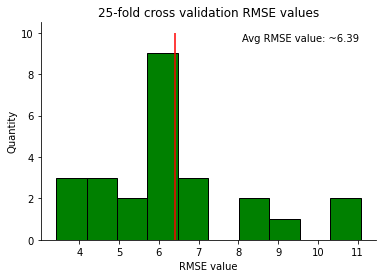

In [1432]:
# enter your code here
np.random.seed(seed=1429)
def kfold_cross_validation(df, k):
    '''
    Inputs: df - the data we're generating cross validation sets on, pandas dataframe
            k - number of folds to perform
    Output: splits - the validation sets for each fold
    '''
    
    # Generating the folds
    ids = np.arange(0, len(df), 1)
    np.random.shuffle(ids)
    df_shuffled = df.iloc[ids]
    partitions = [int(x) for x in np.linspace(0, len(df), k+1, endpoint=True)]
    splits = [df_shuffled[(partitions[i]):(partitions[i+1])] for i in range(k)]
    
    return splits


# Generating the folds based on our training dataset
start_time = time.time()
k=25
folds = kfold_cross_validation(bdata_train, k)

# Training on the new train data for each fold
rmse_array = []
for i, fold in enumerate(folds):
    # Separating original training data into new train data and validation set
    features = ['CRIM', 'RM', 'ZN']
    train_set = bdata_train.merge(fold.drop_duplicates(), on=features + ['MEDV'], how='left', indicator=True)
    train_set = train_set[train_set['_merge'] =='left_only']
    pop_mean = train_set[features].mean()
    pop_std = train_set[features].std()
    
    # Setting up train and test data
    x_train = train_set[features].copy()
    x_train = normalize(x_train)
    y_train = train_set[['MEDV']].copy()
    x_test = fold[['CRIM', 'RM', 'ZN']].copy()
    x_test = (x_test - pop_mean) / pop_std
    y_test = fold[['MEDV']].copy()

    # Running nearest neighbor algorithm
    rmse, predictions = nneighbor(x_train, y_train, x_test, y_test, 2, display=False)
    
    # Saving RMSE from this fold
    rmse_array.append(rmse[0])

# Calcualting average RMSE and creating histogram
avg_rmse = np.sum(rmse_array) / len(rmse_array)
print("------------------------------------------------")
print("Total time taken: {} seconds".format(time.time() - start_time))

# Plotting histogram of RMSE results
fig, ax = plt.subplots()
y, x, _ = ax.hist(rmse_array, color='green', edgecolor='black')
plt.vlines(avg_rmse, ymin=y.min(), ymax=y.max()+1, colors='red')
plt.title('25-fold cross validation RMSE values')
plt.xlabel('RMSE value')
plt.ylabel('Quantity')
plt.text(0.95, 0.95, s='Avg RMSE value: ~' + str(np.round(avg_rmse,2)), ha='right', va='top', transform=ax.transAxes)
ax.spines[['right', 'top']].set_visible(False)
plt.show();

*The average cross-validated rmse value across the 25 iterations is ~6.39. This is less than the RMSE calcualted in 2.3 without cross validation (7.84). Furthermore, I observe that the most common bin is right around an RMSE of 6 or so. There's definitely variance (the range is less than 4 to about 11), but as our number of cross-validation folds increases, there seems to be a somewhat normal distribution forming.*

### 2.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Use 10-fold cross validation and L2 normalization, and the same features as in 2.5. Report the RMSE for K=15 and the running time of the algorithm. What do you observe?

In [1433]:
np.random.seed(seed=1429)
"""
Function
--------
K-Nearest Neighbors

Implementation of nearest neighbors algorithm.

Parameters
----------
x_train: array
    Array of numerical feature values for training the model.
y_train: array
    Array of numerical output values for training the model.
x_test: array
    Array of numerical feature values for testing the model.
y_test: array
    Array of numerical output values for testing the model.
L: int
    Order of L-norm function used for calculating distance.
K: int
    Neighbors to include in algorithm
    
Returns
-------
rmse : int
    Value of the RMSE from data.
"""

def knn(x_train, y_train, x_test, y_test, L, K):
    predictions = np.zeros(x_test.shape[0])
    for i in range(x_test.shape[0]):
        distances = distance(x_test.iloc[i], x_train, L)
        predictions[i] = y_train.iloc[np.argsort(distances)[:K]].mean()
    rmse = compute_rmse(y_test, predictions)
    return rmse

# Generating the folds based on our training dataset
start_time = time.time()
k=10
folds = kfold_cross_validation(bdata_train, k)

# Training on the new train data for each fold
rmse = []
for i, fold in enumerate(folds):
    # Separating original training data into new train data and validation set    
    features = ['CRIM', 'RM', 'ZN']
    train_set = bdata_train.merge(fold.drop_duplicates(), on=features + ['MEDV'], how='left', indicator=True)
    train_set = train_set[train_set['_merge'] =='left_only']
    
    pop_mean = train_set[features].mean()
    pop_std = train_set[features].std()
    
    # Setting up train and test data
    x_train = train_set[features].copy()
    x_train = normalize(x_train)
    y_train = train_set[['MEDV']].copy()
    x_test = fold[features].copy()
    x_test = (x_test - pop_mean) / pop_std
    y_test = fold[['MEDV']].copy()
    
    # Running k nearest neighbor algorithm
    curr_rmse = knn(x_train, y_train, x_test, y_test, 2, 15)
    # Saving RMSE from this fold
    rmse.append(curr_rmse)
#     rmse.append(knn(x_train, y_train, x_test, y_test, 2, 15))

# Report RMSE
print("Time taken: {0:.2f} seconds".format(time.time() - start_time))
print(rmse)
print(np.mean(rmse))
np.sum(rmse) / len(rmse)

Time taken: 0.29 seconds
[array([3.64301045]), array([4.81479348]), array([5.1297406]), array([4.59598095]), array([6.92684388]), array([4.91320443]), array([3.66861017]), array([4.01073749]), array([6.69237298]), array([5.49675736])]
4.989205179648186


4.989205179648186

*Using 10 cross validation folds, K=15 nearest neighbors, and the same features as the model in 2.5, this model RMSE was ~4.989. This is lower than I found in 2.5 using 25 fold cross validation, which shows that k-nearest neighbors increases the quality of our predictions, even with less cross-validation folds.*

### 2.7 Using cross validation to find K

Compute the cross-validated RMSE for values of K between 1 and 25 using 10-fold cross-validation and L2 normalization.  Use the following features in your model: `CRIM, ZN, RM, AGE, DIS, TAX`.  Create a graph that shows how cross-validated RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

Finally, report the test RMSE using the value of K that minimized the cross-validated RMSE. (Continue to use L2 normalization and the same set of features). How does the test RMSE compare to the cross-validated RMSE, and is this what you expected? How does the test RMSE compare to the test RMSE from 2.4, and is this what you expected?

Time taken: 7.34 seconds


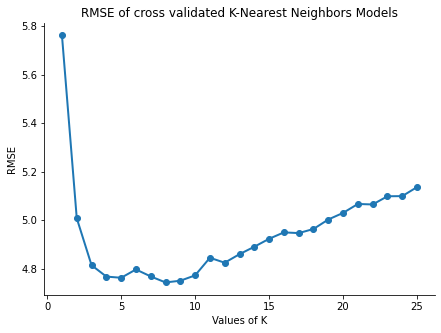

The value of K that minimized RMSE is: 8 with an RMSE of: ~4.743


In [1434]:
np.random.seed(seed=1429)
start_time = time.time()
# enter your code here

folds = kfold_cross_validation(bdata_train, 10)
rmse_array = []
for k in range(25):
    rmse = []
    # Training on the new train data for each fold
    for i, fold in enumerate(folds):
        # Separating original training data into new train data and validation set   
        features = ['CRIM', 'ZN', 'RM', 'AGE', 'DIS', 'TAX']
        train_set = bdata_train.merge(fold.drop_duplicates(), on=features + ['MEDV'], how='left', indicator=True)
        train_set = train_set[train_set['_merge'] =='left_only']
        pop_mean = train_set[features].mean()
        pop_std = train_set[features].std()

        # Setting up train and test data
        x_train = train_set[features].copy()
        x_train = normalize(x_train)
        y_train = train_set[['MEDV']].copy()
        x_test = fold[features].copy()
        x_test = (x_test - pop_mean) / pop_std
        y_test = fold[['MEDV']].copy()
    
        # Running k nearest neighbor algorithm
        rmse.append(knn(x_train, y_train, x_test, y_test, 2, k+1))
        
    # Saving average RMSE for this iteration
    rmse_array.append(np.sum(rmse)/len(rmse))
    
print("Time taken: {0:.2f} seconds".format(time.time() - start_time))

# Displaying results
fig, ax = plt.subplots(figsize=(7,5))
plt.plot([x+1 for x in range(25)], rmse_array, linewidth=2, marker='o')
plt.xlabel('Values of K')
plt.ylabel('RMSE')
plt.title('RMSE of cross validated K-Nearest Neighbors Models')
ax.spines[['right', 'top']].set_visible(False)
plt.show();
print("The value of K that minimized RMSE is: {x} with an RMSE of: ~{y}"\
      .format(x=np.argmin(rmse_array)+1, 
              y=np.round(rmse_array[np.argmin(rmse_array)], 3)))


In [1435]:
features = ['CRIM', 'ZN', 'RM', 'AGE', 'DIS', 'TAX']
pop_mean = bdata_train[features].mean()
pop_std = bdata_train[features].std()
    
# Setting up train and test data
x_train = bdata_train[features].copy()
x_train = normalize(x_train)
y_train = bdata_train[['MEDV']].copy()
x_test = bdata_test[features].copy()
x_test = (x_test - pop_mean) / pop_std
y_test = bdata_test[['MEDV']].copy()
    
# Running k nearest neighbor algorithm
rmse = knn(x_train, y_train, x_test, y_test, 2, 15)
rmse

array([6.85592104])

*The RMSE is highest when K=1, gradually decreases until it reaches a minimum and then gradually increases again as K trends to 25. This makes sense because as K increases, our validation sets get smaller, and our training data begins to look more and more like our original training data when K=1. A reasonable choice for K is 8, where the graph is at its minimum.*

*The RMSE of the K value that minimized the cross-validated RMSE is ~4.743. Simply running the K-nearest neighbors algorithm using K=7 without cross validation results in an RMSE of 6.855. This is much higher (and a bigger difference than I expected). It makes sense that cross validation would reduce RMSE by allowing the model to validate against a subset of the data, but this shows that there can be a bit improvement from doing so.*

*The RMSE is higher than I found in my optimal model in 2.4, but I'm also not using the same features. I found that CRIM, RM, AGE, DIS, TAX, PTRATIO, LSTAT and B were optimal. In 2.7, we are using ZN, and not using PTRATIO, LSTAT and B, so they're not the same models.*

### Extra-Credit: Forward selection

Thus far the choice of predictor variables has been rather arbitrary. For extra credit, implement a basic [forward selection](https://see.stanford.edu/materials/aimlcs229/cs229-notes5.pdf) algorithm to progressively include features that decrease the cross-validated RMSE of the model. Note that the optimal value of K may be different for each model, so you may want to use cross-validation to choose K each time (but it is also fine if you fix K at the optimal value from 2.7).  Create a graph that shows RMSE as a function of the number of features in the model. Label each point on the x-axis with the name of the feature that is added at that step in the forward selection algorithm. *(For instance, if the optimal single-feature model has CRIM with RMSE = 10, and the optimal two-feature model has CRIM+ZN with RMSE=9, the first x-axis label will say CRIM and the second x-axis lable with say ZN)*

In [1436]:
# enter your code here